# Importing Libraries

In [1]:
import math
import pandas as pd
import numpy as np
from scipy.stats import t, f
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Loading Data

In [2]:
auto = pd.read_csv("../data/Auto.csv", na_values="?")
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


# Cleaning Data

In [3]:
auto = auto.dropna()
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


# Linear Regression

In [4]:
# Training model
lm = LinearRegression()
X = auto.horsepower.values.reshape(-1, 1)
y = auto.mpg
lm.fit(X, y)

LinearRegression()

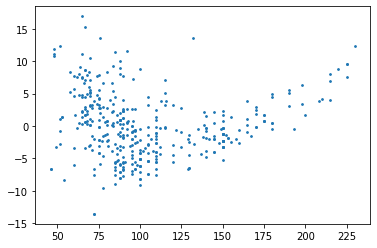

In [5]:
# Model analysis
predictions = lm.predict(X)
residuals = y - predictions
plt.scatter(auto.horsepower, residuals, s=3)

In [6]:
# Estimating residual standard error
n = X.size
x_bar = np.mean(X)
y_bar = np.mean(y)
RSS = sum(residuals ** 2)
TSS = sum((y - y_bar) ** 2)
RSE = math.sqrt(RSS / (n-2))
RSE

4.90575691954594

In [7]:
# Estimating standard errors in regression model
SE_intercept = math.sqrt(RSE + (x_bar ** 2) / sum((X - x_bar) ** 2))
SE_slope = math.sqrt(RSE / sum((X - x_bar) ** 2))
SE_intercept, SE_slope

(2.21914326984916, 0.0029100713352269015)

In [8]:
# Significance testing
t_statistic = lm.coef_[0] / SE_slope
p_value = 1 - t.cdf(t_statistic, n-2)
p_value

1.0

In [9]:
# R^2 statistic
R_squared = 1 - RSS / TSS
R_squared

0.6059482578894346

In [10]:
# Print coefficients
lm.coef_

array([-0.15784473])

In [11]:
# Print intercept
lm.intercept_

39.93586102117047

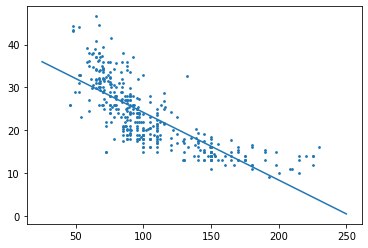

In [12]:
# Plot resulting curve
plt.scatter(auto.horsepower, auto.mpg, s=3)
x_curve = np.linspace(25, 250, 1000)
y_curve = lm.intercept_ + lm.coef_[0] * x_curve
plt.plot(x_curve, y_curve)

# Quadratic Regression

In [13]:
# Training model
qm = LinearRegression()
auto["hp2"] = np.square(auto["horsepower"])
X = auto[["horsepower", "hp2"]].values.reshape(-1, 2)
qm.fit(X, y)

LinearRegression()

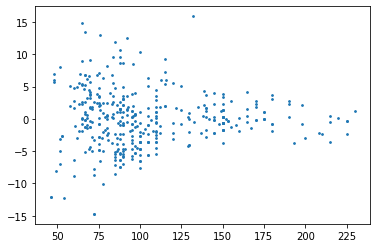

In [14]:
# Model analysis
predictions = qm.predict(X)
residuals = y - predictions
plt.scatter(auto.horsepower, residuals, s=3)

In [15]:
# Estimating residual standard error
n = X.size / 2
x_bar = np.mean(X[0, :])
y_bar = np.mean(y)
RSS = sum(residuals ** 2)
TSS = sum((y - y_bar) ** 2)
RSE = math.sqrt(RSS / (n-2))
RSE

4.3683093636883195

In [16]:
# Estimating standard errors in regression model
SE_intercept = math.sqrt(RSE + (x_bar ** 2) / sum((X[:, 0] - x_bar) ** 2))
SE_slope = math.sqrt(RSE / sum((X[:, 0] - x_bar) ** 2))
SE_intercept, SE_slope

(2.0906755120864666, 1.2551213812204553e-05)

In [17]:
# Significance testing
f_statistic = ((TSS - RSS) / 2) / (RSS / n - 3)
p_value = 1 - f.cdf(f_statistic, n, 2)
p_value

0.001950190228970583

In [18]:
# R^2 statistic
R_squared = 1 - RSS / TSS
R_squared

0.6875590305127515

In [19]:
# Print coefficients
qm.coef_

array([-0.46618963,  0.00123054])

In [20]:
# Print intercept
qm.intercept_

56.90009970211294

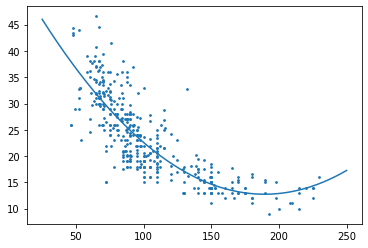

In [21]:
# Plot resulting curve
plt.scatter(auto.horsepower, auto.mpg, s=3)
x_curve = np.linspace(25, 250, 1000)
y_curve = qm.intercept_  + qm.coef_[0] * x_curve + qm.coef_[1] * x_curve ** 2
plt.plot(x_curve, y_curve)

# Reciprocal Transformation

In [22]:
# Training model
rm = LinearRegression()
X = auto.horsepower.values.reshape(-1, 1)
y = np.reciprocal(y)
rm.fit(X, y)

LinearRegression()

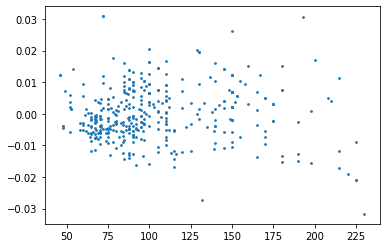

In [23]:
predictions = rm.predict(X)
residuals = y - predictions
plt.scatter(auto.horsepower, residuals, s=3)

In [24]:
# Estimating residual standard error
n = X.size
x_bar = np.mean(X)
y_bar = np.mean(y)
RSS = sum(residuals ** 2)
TSS = sum((y - y_bar) ** 2)
RSE = math.sqrt(RSS / (n-2))
RSE

0.00864599160365389

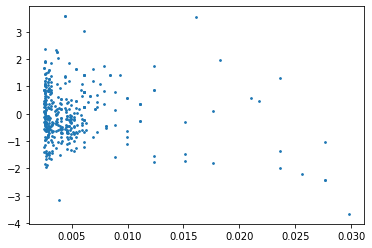

In [25]:
# Compute leverages
leverages = 1/n + (X - x_bar) ** 2 / sum((X - x_bar) ** 2)
studentized_residuals = residuals / RSE
plt.scatter(leverages, studentized_residuals, s=3)

In [26]:
# Estimating standard errors in regression model
SE_intercept = math.sqrt(RSE + (x_bar ** 2) / sum((X - x_bar) ** 2))
SE_slope = math.sqrt(RSE / sum((X - x_bar) ** 2))
SE_intercept, SE_slope

(0.16578879387503062, 0.000122168158402539)

In [27]:
# Significance testing
t_statistic = rm.coef_[0] / SE_slope
p_value = 1 - t.cdf(t_statistic, n-2)
p_value

0.0013265859893333287

In [28]:
# R^2 statistic
R_squared = 1 - RSS / TSS
R_squared

0.730697640643458

In [29]:
# Print coefficients
rm.coef_

array([0.00036953])

In [30]:
# Print intercept
rm.intercept_

0.009218138877684905

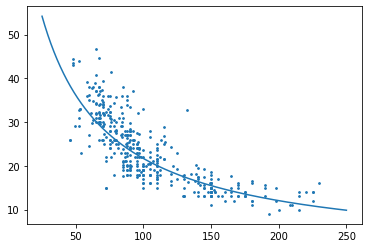

In [31]:
# Plot resulting curve
plt.scatter(auto.horsepower, auto.mpg, s=3)
x_curve = np.linspace(25, 250, 1000)
y_curve = np.reciprocal(rm.intercept_ + rm.coef_[0] * x_curve)
plt.plot(x_curve, y_curve)